### Instructions: 
Review the instructor video and required readings to complete the problems below. You will need to import the sklearn objects (functions) as needed, within the cell problem that requires it. Research the output as needed - any explanations are to be within the context/theme of the data.

Submit your completed pdf and jupyter files to Blackboard.

In [1]:
# Import/run these libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Replace --- and enter your first name in place of the the blank line.
#Your name will be the variable name of the dataframe you'll need to refer to solving the problems as needed.
Patrick =  sns.load_dataset("tips")


In [3]:
#1. Review information about the dataframe using the info method.
Patrick.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
#2. Review the first five rows of the data by using the head method.
Patrick.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
#3a. View the descriptive statistics using the describe method on the data set. 
Patrick.describe()    

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
#3b. Explain the count, average, maximum and minimum values in the context of the data.
# Explain using a comment symbol below.

#Count is the toal number of bills in the data set, the mean shows the average bull amount and tip amount,
#and the min and max show the smallest and largest bills and tips for a bill

In [7]:
#4. Rename the column label 'size' to party_size. 
 # Note: Since size is an python attribute, the column will be referred to as party_size going foward.  
Patrick.rename(columns ={"size" : "party_size"}, inplace = True)

Text(0, 0.5, 'Tip in Dollars')

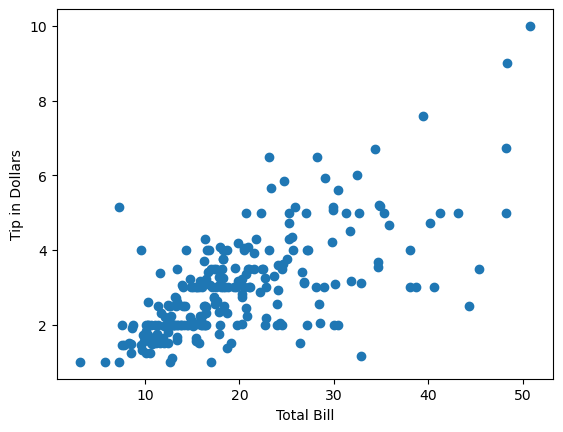

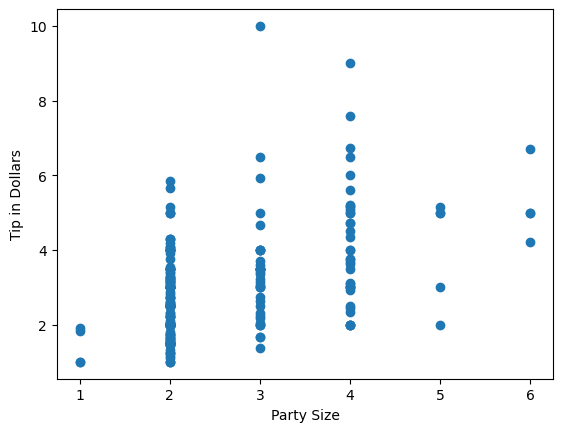

In [8]:
#5. Provide two scatter plots: 1) total bill and tip; 2) party_size and tip. 
# You may use any library for the scatter plots. Be sure to provide x and y axis labels.
fig = plt.figure()
plt.scatter(Patrick['total_bill'],Patrick['tip'])
plt.xlabel("Total Bill")
plt.ylabel("Tip in Dollars")
fig2 = plt.figure()
plt.scatter(Patrick['party_size'],Patrick['tip'])
plt.xlabel("Party Size")
plt.ylabel("Tip in Dollars")

### Simple Linear Regression

In [9]:
#6a. Import the appropriate sklearn object to split the data for training and testing (partially coded below).
    #This will be for a simple linear regression with one feature: party_size, and one target: tip
    #Inside the train_test_split function, enter the value 433 as the argument for random_state
# Replace --- with the proper syntax.

from sklearn.model_selection import train_test_split   
    
X_train, X_test, y_train, y_test = train_test_split(Patrick.party_size.values.reshape(-1,1), Patrick.tip, random_state=433)

In [10]:
#6b. Use the shape attribute on X_train and X_test, and print out the results.
print(X_train.shape)
print(X_test.shape)

(183, 1)
(61, 1)


In [11]:
#6c. Why is there a difference in the X_train and X_test shapes? (no more than two sentences)
# Explain using a comment symbol below. 
# This is becasue test contains 25% of the data while the other contains 75% of the data (by default)

In [12]:
#7. 
# 1. Import the sklearn object to import the linear model and the LinearRegression estimator.
# 2. Instantiate the LinearRegression estimator to the variable name: reg
# 3. Then train the reg using the fit method on the train subsets. 
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X=X_train , y =y_train)

LinearRegression()

In [13]:
#8a. Display the model's y-intercept using the intercept_ attribute.
reg.intercept_

1.2139981961517905

In [14]:
#8b. Determine the feature's coefficient in the model using the coef_ attribute.
reg.coef_

array([0.67900287])

In [15]:
#9a. Use the model's predict method on a party_size of 3.
reg.predict([[3]])

array([3.25100681])

In [16]:
#9b. Explain the result from problem 9a within the context of the problem. (no more than two sentences)
# Use a comment symbol below.

#The predicted tip for party of size 3 is around $3.25

In [17]:
#10. Determine the r-squared using the accuracy method on the test data. 
reg.score(X_test, y_test)

0.29756053218763523

<Axes: xlabel='party_size', ylabel='tip'>

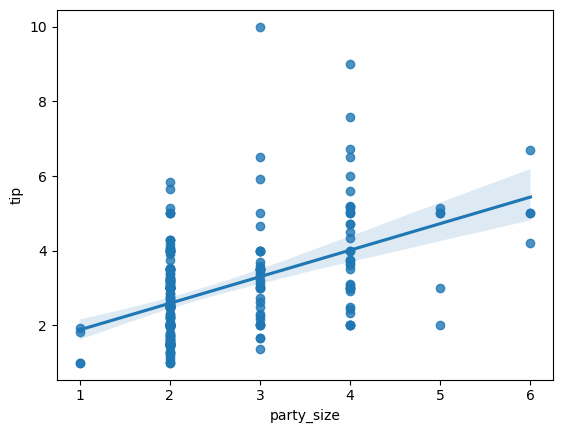

In [18]:
#11. Use the seaborn regplot function using the feature and target variables.
sns.regplot(data=Patrick , x = "party_size", y = "tip")

In [19]:
#12a. 
# 1. Import sklearn's cross_val_score object. 
# 2. Use 3-folds cross validation (cv=3) and display its three r-squares.
# 3. Display the results of the cross validation approach. 

from sklearn.model_selection import cross_val_score   #remove the blank lines complete import code 
cv_results = cross_val_score(reg, Patrick.party_size.values.reshape(-1,1), 
                Patrick.tip, cv=3)
print(cv_results)

[0.26078893 0.26056598 0.18102844]


In [20]:
#12b. Average the three are r-squares from the cross-validation using the mean method. 
print(cv_results.mean())

0.2341277803519809


In [21]:
#12c. Did the model's accuracy score improve from problem 10? How? 
# Use a comment explaining your answer.

#The accuracy score did not improve, it actually got worse, this can be
#attributed to the splitting of the data


In [22]:
#13. Create subset of the dataframe to only include male data and determine their tip average. 
Male = Patrick[Patrick['sex']=='Male']
Male.head()
print(Male.tip.mean())

3.0896178343949043


In [23]:
#14. Create subset of the dataframe to only include female data and determine their tip average. 
Female = Patrick[Patrick['sex']=='Female']
Female.head(5)
print(Female.tip.mean())

2.8334482758620685


Text(0, 0.5, 'Average Tip in Dollars')

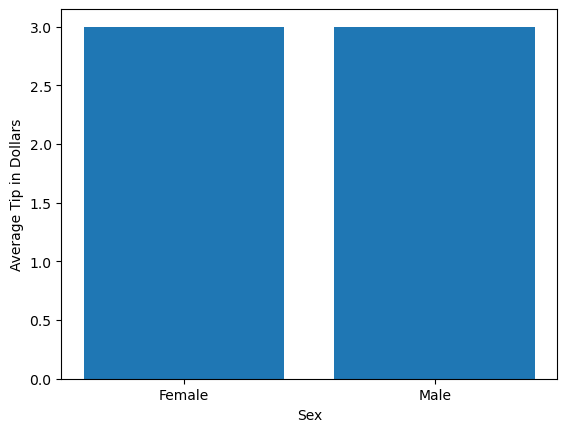

In [24]:
#15. Create a bar chart that compares the tip average of males versus females.
# You may use any library for the bar chart. Be sure to provide x and y axis labels.
fig3=plt.figure()
plt.bar(Patrick['sex'], Patrick.tip.mean())
plt.xlabel("Sex")
plt.ylabel("Average Tip in Dollars")